<a href="https://colab.research.google.com/github/JMQuinones/DS-ML/blob/master/notebook/practica_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica primer parcial**
* ### **Grupo 4**

* ### **Integrantes**



>1.   Orellana Espinoza Elizabeth Margot
2.   Quiñones Vargas Jorge Mauricio
3.   Velasco Miranda Juan Pablo
4. Viza Contreras Maria Elena





# Dataset
El dataset asignado proporciona informacion sobre la salud y habitos de diversas personas, incluyendo


*   Enfermedad del corazon
*   Indice de masa corporal
*   Fuma
*   Consumo de alcohol
*   Actividad fisica
*   Raza
*   ....

Este dataset corresponde a la categoria de modelos de decision, considerando el target si una persona tiene o no enfermedades del corazon (HeartDisease); y como feture todas las demas columnas.



## **Pre-procesamiento de datos**
* ### **Importacion y Configuracion**
Comenzamos importando los paquetes que vamos a utilizar, entre estos se tiene

  *  **Pandas**, para el manejo del dataset
  *  **Numpy**, para calculos matriciales
  *  **matplotlib** y seaborn, para la graficacion
  *  **sklearn**, para el proceso de entrenamiento y modelado
 <br>
* ### **Procesamiento de datos**
Antes de aplicar **features engineering** necesitamos pre-procesar los datos para obtener un analisis adecuado<br>
Para el conjunto de datos necesitaremos:


>1.   **Cargar** el conjunto de datos
2.   **Limpiar** los datos para corregir cualquier error o inconsistencia
3.   **Codificar** el tipo de dato estadistico(numerico o categorico)
4.   **Imputar** los valores faltantes




In [2]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np

#Importar matplotlib y seaborn - para graficacion
import matplotlib.pyplot as plt
import seaborn as sns

#Importar sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

## **1. Cargar datos**

Los datos se cargan directamente desde el repositorio de Github

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/JMQuinones/DS-ML/master/datasets/heart_cleaned.csv',encoding = "ISO-8859-1")

In [4]:
# Vamos visualizar los datos
data.head(11)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [5]:
#imputer = SimpleImputer(strategy="median")
#non_floats = []
#for col in data:
#    if data[col].dtypes != "float64":
#        non_floats.append(col)
#df_num = data.drop(columns=non_floats)
#df_num

In [6]:
#imputer.fit(df_num)
#X = imputer.transform(df_num)
#X
#housing_tr = pd.DataFrame(X, columns=df_num.columns,
#index=df_num.index)
#housing_tr

## **2. Limpiar datos**

Los datos no contiene datos vacios (null)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## **3. Codificar datos**

Se debe convertir las variables categoricas (no numericas) a numericas

In [8]:
# Se verifica que columnas tienen variables categoricas
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [9]:
# Se verifica que columnas tienen variables continuas
con_cols = [col for col in data.columns if data[col].dtype != 'O']
con_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [10]:
col_categorical = [var for var in data.columns if data[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(data[i].unique())} labels")

HeartDisease: 2 labels
Smoking: 2 labels
AlcoholDrinking: 2 labels
Stroke: 2 labels
DiffWalking: 2 labels
Sex: 2 labels
AgeCategory: 13 labels
Race: 6 labels
Diabetic: 4 labels
PhysicalActivity: 2 labels
GenHealth: 5 labels
Asthma: 2 labels
KidneyDisease: 2 labels
SkinCancer: 2 labels


In [11]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [12]:
# Funcion para convertir los datos categoricos a continuos
def col_cat_con(cat_colums ,df):
    for i in cat_colums :
        df[i] = df[i].astype('category').cat.codes

In [13]:
col_cat_con(col_categorical,data)
data.head(15)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


# Correlacion de Pearson
La correlacion de pearson indica la relacion entre variables continuas o numericas, la relacion es un valor de -1 a 1 donde 1 significa una correlacion perfecta. <br>
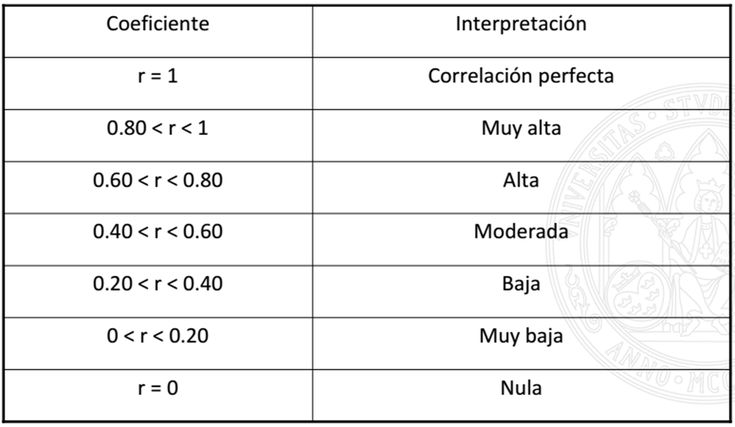

In [14]:
data.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


La variable que nos interesa es el target (y), que en nuestro caso es "HeartDisease". Verificamos la correlacion para decidir que columnas utilizar y cuales eliminar

In [15]:
data.corr()['HeartDisease']

HeartDisease        1.000000
BMI                 0.051803
Smoking             0.107764
AlcoholDrinking    -0.032080
Stroke              0.196835
PhysicalHealth      0.170721
MentalHealth        0.028591
DiffWalking         0.201258
Sex                 0.070040
AgeCategory         0.233432
Race                0.034854
Diabetic            0.168553
PhysicalActivity   -0.100030
GenHealth          -0.011062
SleepTime           0.008327
Asthma              0.041444
KidneyDisease       0.145197
SkinCancer          0.093317
Name: HeartDisease, dtype: float64

Se elimina las columnas con una correlacion baja

In [16]:
data.drop(['BMI', 'AlcoholDrinking', 'MentalHealth', 'Sex', 'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'SkinCancer'], axis=1, inplace=True)
data.head()

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,KidneyDisease
0,0,1,0,3.0,0,7,2,0
1,0,0,1,0.0,0,12,0,0
2,0,1,0,20.0,0,9,2,0
3,0,0,0,0.0,0,11,0,0
4,0,0,0,28.0,1,4,0,0


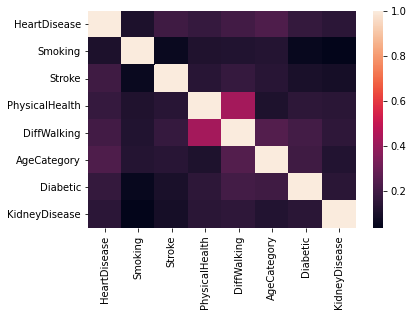

In [17]:
sns.heatmap(data.corr())
plt.show()

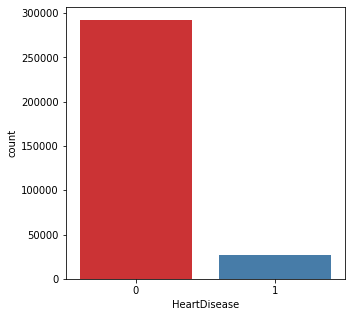

In [18]:
#Mostramos la cantidad de personas que tienen o no una enfermedad del corazon
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="HeartDisease", data=data, palette="Set1")
plt.show()

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes


*   Enfermos del corazon
*   No enfermos



In [19]:
features_mean = list(data.columns[1:-1])
dfE=data[data["HeartDisease"]==1]
dfNE=data[data["HeartDisease"]==0]

In [20]:
dfE.head(10)

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,KidneyDisease
5,1,1,0,6.0,1,11,0,0
10,1,1,0,30.0,1,8,2,0
35,1,1,1,10.0,1,11,2,0
42,1,0,0,0.0,1,12,2,0
43,1,1,0,6.0,1,11,2,1
45,1,1,0,3.0,0,10,0,0
77,1,0,0,0.0,0,7,0,0
78,1,1,0,30.0,0,10,2,1
101,1,1,0,30.0,1,10,0,0
127,1,0,0,2.0,1,10,2,0


In [21]:
dfNE.head(10)

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,KidneyDisease
0,0,1,0,3.0,0,7,2,0
1,0,0,1,0.0,0,12,0,0
2,0,1,0,20.0,0,9,2,0
3,0,0,0,0.0,0,11,0,0
4,0,0,0,28.0,1,4,0,0
6,0,0,0,15.0,0,10,0,0
7,0,1,0,5.0,1,12,2,0
8,0,0,0,0.0,0,12,1,1
9,0,0,0,0.0,1,9,0,0
11,0,1,0,0.0,0,7,0,0


In [22]:
#data[features_mean]

## **4. Imputar datos**
Para este no tenemos datos faltantes.

## **Regresion logistica**
* ### **Preparar el Conjunto de Datos**

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes

1.   Para el entramiento del modelo
2.   Para las pruebas del modelo 




In [23]:
data.head()

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,KidneyDisease
0,0,1,0,3.0,0,7,2,0
1,0,0,1,0.0,0,12,0,0
2,0,1,0,20.0,0,9,2,0
3,0,0,0,0.0,0,11,0,0
4,0,0,0,28.0,1,4,0,0


Se debe separar el target del resto de los datos (features)

In [24]:
x = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']

In [25]:
x

,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,KidneyDisease
0,1,0,3.0,0,7,2,0
1,0,1,0.0,0,12,0,0
2,1,0,20.0,0,9,2,0
3,0,0,0.0,0,11,0,0
4,0,0,28.0,1,4,0,0
...,...,...,...,...,...,...,...
319790,1,0,7.0,1,8,2,0
319791,1,0,0.0,0,3,0,0
319792,0,0,0.0,0,5,0,0
319793,0,0,0.0,0,1,0,0


In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int8

Se divide el conjunto de datos en dos
* **Datos de entrenamiento**, que seran un tercio de los datos totales
* **Datos de prueba**, que seran dos tercios de los datos totales

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 1)

In [28]:
x_test

,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,KidneyDisease
301988,0,0,0.0,0,4,0,0
223127,1,1,0.0,1,12,2,0
216797,1,0,0.0,0,10,0,0
234217,1,0,0.0,0,1,0,0
30822,0,0,0.0,0,11,2,0
...,...,...,...,...,...,...,...
226961,1,0,0.0,0,12,2,0
155461,1,0,20.0,0,9,2,0
63221,1,0,0.0,0,3,0,0
199991,0,0,0.0,1,1,0,0


In [29]:
x_train

,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,KidneyDisease
278369,0,0,7.0,1,10,1,0
314581,0,1,0.0,0,7,0,0
145597,0,0,3.0,0,2,0,0
76470,1,0,0.0,0,9,0,0
167691,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...
117583,1,0,0.0,1,12,0,0
73349,1,0,0.0,0,7,0,0
312201,1,0,30.0,0,8,0,0
267336,0,0,0.0,0,5,0,0


In [30]:
y_test

301988    0
223127    1
216797    0
234217    0
30822     1
         ..
226961    1
155461    0
63221     0
199991    0
228550    0
Name: HeartDisease, Length: 105533, dtype: int8

In [31]:
y_train

278369    0
314581    0
145597    0
76470     0
167691    0
         ..
117583    0
73349     0
312201    0
267336    0
128037    0
Name: HeartDisease, Length: 214262, dtype: int8


* ### **Entrenar el Modelo**

* ### **Hacer las Predicciones**


El modelo se entrenara con la regresion logistica

In [32]:
logistic = LogisticRegression(max_iter=4000)

In [33]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=4000)

In [34]:
y_pred = logistic.predict(x_test)

In [35]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %s" % "{0:.3%}".format(accuracy))

Accuracy: 91.517%


In [36]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision: %s" % "{0:.3%}".format(precision))

Precision: 51.221%


# Metricas de clasificacion


1.   Matriz de confusion



In [37]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Sanos del corazon', 1:'Enfermos del corazon'}, index={0:'Sanos del corazon', 1:'Enfermos del corazon'}, inplace=True)
df_cm

,Sanos del corazon,Enfermos del corazon
Sanos del corazon,95868,679
Enfermos del corazon,8273,713


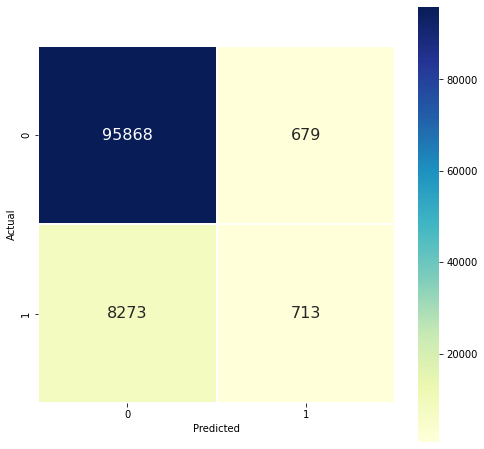

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

La matriz de clasificacion indica los siguientes valores:
P: Positivo, indicando el número de casos reales positivos en los datos
N: Negativo, indicando el número de casos reales negativos en los datos
TP: True positive (positivo real), indica el numero de casos positivos
que son clasificados correctamente por el clasificador
TN: True Negative (negativo real), indica el numero de casos negativos
que son clasificados correctamente por el clasificador
FP: Falso Positivo, indica el número de casos positivos que son clasificados incorrectamente por el clasificador
FP: Falso Negativo, indica el número de casos negativos que son clasificados incorrectamente por el
clasificador

In [39]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
P = TP + FN
N = FP + TN

In [40]:
print('\nPositives(P) = ', P)
print('\nNegatives(N) = ', N)
print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalsos Positives(FP) = ', FP)

print('\nFalsos Negatives(FN) = ', FN)


Positives(P) =  104141

Negatives(N) =  1392

True Positives(TP) =  95868

True Negatives(TN) =  713

Falsos Positives(FP) =  679

Falsos Negatives(FN) =  8273


2. Exactitud y tasa de reconocimiento TP + TN / P + N

In [41]:
etr= (TP + TN) / (P + N)
print("Exactitud y tasa de reconocimiento = "+str(etr*100)+"%")

Exactitud y tasa de reconocimiento = 91.51734528536097%


3. Tasa de error y tasa de clasificacion erronea = FP + FN / P + N

In [42]:
tce = (FP + FN) / (P + N)
print("Tasa de error y tasa de clasificacion erronea = "+str(tce*100)+"%")

Tasa de error y tasa de clasificacion erronea = 8.482654714639024%


4. Sensibilidad, tasa positiva real y recordatorio = TP/P

In [43]:
sensibilidad = TP / P
print("Sensibilidad = "+str(sensibilidad*100)+"%")

Sensibilidad = 92.05596258918197%


5. Especificidad y tasa negativa real TN / N

In [44]:
tnr = TN / N 
print("Tasa negativa real = "+str(tnr*100)+"%")

Tasa negativa real = 51.22126436781609%


6. Precision TP / TP + FP

In [45]:
precision = TP / (TP+FP)
print("Precision = "+str(precision*100)+"%")

Precision = 99.29671558929847%


# Predicciones con datos ingresados

In [75]:
smoking = input("Usted fuma? (0 para no 1 para si)")
stroke = input("Tuvo algun derrame cerebral? (0 para no 1 para si)")
physical_health = input("cual su nivel de salud fisica?")
diff_walking = input("Tiene dificultades para caminar? (0 para no 1 para si)")
age_category = input("Categoria de edad: ")
diabetic = input("Es diabetico? (0 para no 1 para si) 2 para casi diabetico" )
kidney_disease = input("Tiene alguna enfermedad renal? (0 para no 1 para si)")

frame = {'Smoking': smoking,
            'Stroke': stroke,
            'PhysicalHealth': physical_health,
            'DiffWalking': diff_walking,
            'AgeCategory':age_category,
            'Diabetic': diabetic,
            'KidneyDisease':kidney_disease} 

features = pd.DataFrame(frame, index=[0])
prediction = logistic.predict(features)
if prediction == 0:
  print("\nPrediction: {}".format(prediction) + " No tiene una enfermedad del corazon")
else: 
  print("\nPrediction: {}".format(prediction) + " Tiene una enfermedad del corazon")

  
				



Usted fuma? (0 para no 1 para si)0
Tuvo algun derrame cerebral? (0 para no 1 para si)1
cual su nivel de salud fisica?1
Tiene dificultades para caminar? (0 para no 1 para si)1
Categoria de edad: 2
Es diabetico? (0 para no 1 para si) 2 para casi diabetico3
Tiene alguna enfermedad renal? (0 para no 1 para si)4

Prediction: [1]tiene una enfermedad del corazon


# Arbol de clasificacion